### Dataset: Pesquisa Nacional por Amostra de Domicílios (PNAD) 2015

O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da **Pesquisa Nacional por Amostra de Domicílios - PNAD**, tem como finalidade a produção de
informações básicas para o estudo do desenvolvimento socioeconômico do País. 

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset
d = pd.read_csv('dados.csv')
d.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Distribuição de Frequência

A distribuição de frequência de uma variável mostra quantas vezes determinado valor da variável ocorre no conjuto de dados em questão.

$f$ = Frequência Absoluta

$p$ = Frequência Relativa (Porcentagem), onde: $p=\frac{f}{n}$

---
SICSÚ, DANA. **Estatística aplicada**: Análise exploratória de dados. 1. ed. p. 9. São Paulo: Saraiva, 2012.

##### Distribuição de Frequência Qualitativa

As variáveis qualitativas são aquelas que não podem ser expresas em uma escala numérica correspondente a quantidades. Elas apresentam duas ou mais categorias que podem ser ordenadas ou não.

---
SICSÚ, DANA. **Estatística aplicada**: Análise exploratória de dados. 1. ed. p. 5. São Paulo: Saraiva, 2012.

In [2]:
# Distribuição de Freq. Qualitativa: Sexo
# Dicionário de Genero
genero = {
    0: 'Masculino',
    1: 'Feminino'
}

#Series com frequencias (Absoluta e Relativa)
freq_abs = d['Sexo'].value_counts()
freq_rel = d['Sexo'].value_counts(normalize=True) * 100

# DataFrame com as frequencias
df_sexo = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_sexo.rename(index=genero, inplace=True)

# Renomeacao de coluna de indices
df_sexo.rename_axis('Sexo', axis='columns', inplace=True)
df_sexo.head()

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


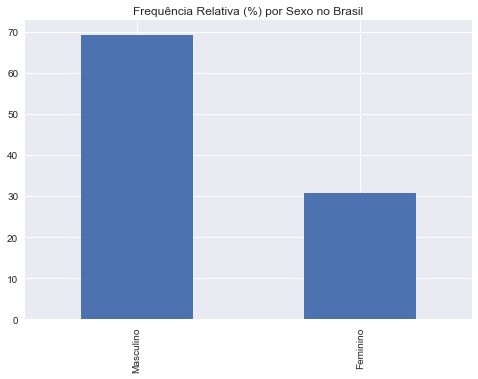

In [3]:
# Plotagem: Frequencia relativa (Sexo)
df_sexo.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Sexo no Brasil'
);

In [4]:
# Distribuição de Freq. Qualitativa: Raça
# Dicionário de Raça
raca = {
    0: 'Indigena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem Declaração'
}

#Series com frequencias (Absoluta e Relativa)
freq_abs = d['Cor'].value_counts()
freq_rel = d['Cor'].value_counts(normalize=True) * 100

# DataFrame com as frequencias
df_raca = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_raca.rename(index=raca, inplace=True)

# Renomeacao de coluna de indices
df_raca.rename_axis('Raça', axis='columns', inplace=True)
df_raca.head()

Raça,Frequência,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indigena,357,0.464602
Amarela,352,0.458095


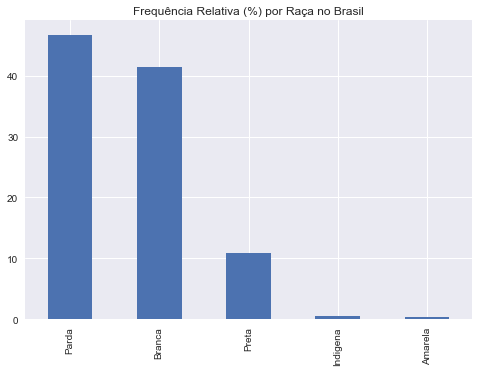

In [5]:
# Plotagem: Frequencia relativa (Raça)
df_raca.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Raça no Brasil'
);

In [6]:
# Distribuição de Freq. Qualitativa Anos de Estudo - Utilizando a funcao crosstab
# Dicionario de Anos de Estudos
estudos = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}

# Distribuicao de frequencia absoluta
freq_abs = pd.crosstab(d['Anos de Estudo'],
                      d['Sexo'])

# Incluindo rotulos de linhas e colunas
freq_abs.rename(index=estudos, inplace=True)
freq_abs.rename(columns=genero, inplace=True)
freq_abs.head(20)

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,4476,1373
1 ano,1081,307
2 anos,1637,464
3 anos,2227,664
4 anos,5020,1709
5 anos,3247,1252
6 anos,1790,655
7 anos,1942,747
8 anos,5700,2280


In [7]:
# Crosstab com funções agregadoras
# Distribuicao de anos de estudo (Homem/Mulher) agregando a media de renda
freq_abs = pd.crosstab(d['Anos de Estudo'],
                      d['Sexo'],
                      aggfunc='mean',
                      values=d['Renda'])

# Incluindo rotulos de linhas e colunas
freq_abs.rename(index=estudos, inplace=True)
freq_abs.rename(columns=genero, inplace=True)

print('A renda média entre homem/malhur baseada nos anos de estudo')
freq_abs.head(20)

A renda média entre homem/malhur baseada nos anos de estudo


Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,799.494638,516.201748
1 ano,895.629047,492.771987
2 anos,931.178986,529.911638
3 anos,1109.203862,546.853916
4 anos,1302.329283,704.279111
5 anos,1338.653218,781.389776
6 anos,1448.875419,833.732824
7 anos,1465.497940,830.751004
8 anos,1639.396667,933.615351


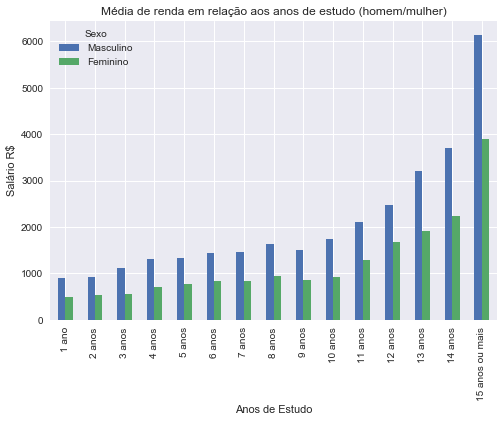

In [8]:
# Plotagem: Relacao anos de estudo x média de renda (homem/mulher)
freq_abs.iloc[1:-1].plot(
    kind='bar',    
    title='Média de renda em relação aos anos de estudo (homem/mulher)'
)
plt.ylabel('Salário R$')
plt.show()

##### Distribuição de Frequência Quantitativa

As variáveis quantitativas são aquelas que podem ser expressas por meio de números que representam quantidades. O número de funcionários de uma empresa, as compras mensais, em reais, de matéria-prima, um índice de liquidez.

---
SICSÚ, DANA. **Estatística aplicada**: Análise exploratória de dados. 1. ed. p. 4. São Paulo: Saraiva, 2012.

In [11]:
# Categorizacao de variaveis quantitativas
a = 1